# SPARC-4 products polarimetry
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024 / Marina Mello, Inpe 10 Set 2025

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to files 


* Channel 1

In [3]:
db_sco_1 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs1/20240605_sparc4acs1_db.csv'

polar_proc_sco_1 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs1/20240605_s4c1_000750_v1723sco_proc.fits'

polar_stack_sco_1 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs1/20240605_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_stack.fits'

polar_sco_1 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs1/20240605_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_polar.fits'

polar_time_series_sco_1 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs1/20240605_s4c1_V1723Sco_POLAR_L2_S+N_lc.fits'

* Channel 2

In [4]:
db_example_2 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs2/20240605_sparc4acs2_db.csv'

polar_proc_sco_2 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs2/20240605_s4c2_000750_v1723sco_proc.fits'

polar_stack_sco_2 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs2/20240605_s4c2_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_stack.fits'

polar_sco_2 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs2/20240605_s4c2_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_polar.fits'

polar_time_series_sco_2 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs2/20240605_s4c2_V1723Sco_POLAR_L2_S+N_lc.fits'

* Channel 3

In [5]:
db_sco_3 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs3/20240605_sparc4acs3_db.csv'

polar_proc_sco_3 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs3/20240605_s4c3_000750_v1723sco_proc.fits'

polar_stack_sco_3 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs3/20240605_s4c3_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_stack.fits'

polar_sco_3 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs3/20240605_s4c3_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_polar.fits'

polar_time_series_sco_3 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs3/20240605_s4c3_V1723Sco_POLAR_L2_S+N_lc.fits'

* Channel 4

In [6]:
db_sco_4 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs4/20240605_sparc4acs4_db.csv'

polar_proc_sco_4 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs4/20240605_s4c4_000750_v1723sco_proc.fits'

polar_stack_sco_4 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs4/20240605_s4c4_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_stack.fits'

polar_sco_4 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs4/20240605_s4c4_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_polar.fits'

polar_time_series_sco_4 = '/home/marina/Documentos/Novas/Sco/20240605/sparc4acs4/20240605_s4c4_V1723Sco_POLAR_L2_S+N_lc.fits'

### Set paths to standard files 


* Channel 1

In [7]:
db_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_sparc4acs1_db.csv'

polar_proc_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_000022_hd298_proc.fits'

polar_stack_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_Gain2_1.0_Conventional_2_HD298383_POLAR_L2_stack.fits'

polar_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_Gain2_1.0_Conventional_2_HD298383_POLAR_L2_polar.fits'

polar_time_series_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_hd298_POLAR_L2_S+N_lc.fits'

* Channel 2

In [8]:
db_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_sparc4acs1_db.csv'

polar_proc_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_000750_v1723sco_proc.fits'

polar_stack_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_stack.fits'

polar_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_polar.fits'

polar_time_series_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_V1723Sco_POLAR_L2_S+N_lc.fits'

* Channel 3

In [9]:
db_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_sparc4acs1_db.csv'

polar_proc_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_000750_v1723sco_proc.fits'

polar_stack_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_stack.fits'

polar_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_polar.fits'

polar_time_series_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_V1723Sco_POLAR_L2_S+N_lc.fits'

* Channel 4

In [10]:
db_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_sparc4acs1_db.csv'

polar_proc_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_000750_v1723sco_proc.fits'

polar_stack_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_stack.fits'

polar_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_polar.fits'

polar_time_series_std_1 = '/home/marina/Documentos/Novas/Sco/20240603/sparc4acs1/20240603_s4c1_V1723Sco_POLAR_L2_S+N_lc.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [11]:
db_1 = ascii.read(db_sco_1)
pd.DataFrame(np.array(db_1))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-05T20:29:21.792000,0.00001,10,-60,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
1,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-05T20:29:22.912073,0.00001,10,-60,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
2,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-05T20:29:24.032146,0.00001,10,-60,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
3,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-05T20:29:25.152218,0.00001,10,-60,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
4,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-05T20:29:26.272291,0.00001,10,-60,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-06T07:27:29.588314,2.00000,17:55:33,-61:44:50,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L2,None,True
530,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-06T07:27:32.708377,2.00000,17:55:33,-61:44:50,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L2,None,True
531,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-06T07:27:35.828440,2.00000,17:55:33,-61:44:50,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L2,None,True
532,/home/marina.mello/trabalho/novas/V1723_Sco/da...,2024-06-06T07:27:38.948503,2.00000,17:55:33,-61:44:50,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L2,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

## Channel 1

In [12]:
hdul_1 = fits.open(polar_stack_sco_1)
hdul_1.info()

Filename: /home/marina/Documentos/Novas/Sco/20240605/sparc4acs1/20240605_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     149   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   63R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   63R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   63R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   63R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   63R x 13C   [I11, D25.17, D25.17, D25.1

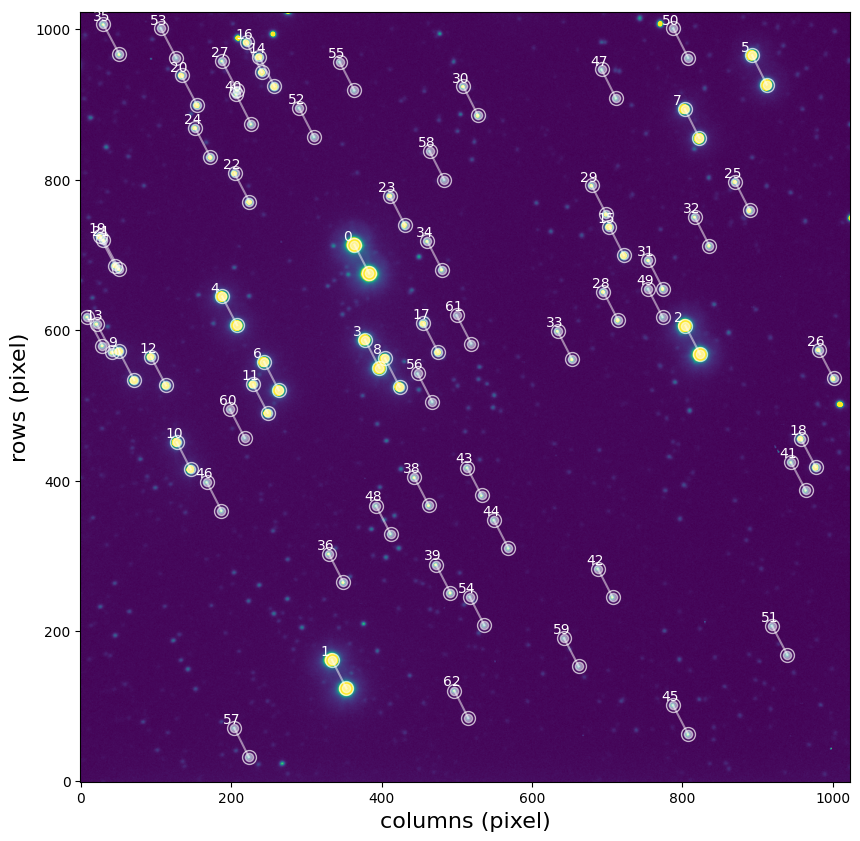

In [13]:
s4plt.plot_sci_polar_frame(polar_stack_sco_1)

In [14]:
polar_1 = fits.open(polar_sco_1)
polar_1.info()

Filename: /home/marina/Documentos/Novas/Sco/20240605/sparc4acs1/20240605_s4c1_Gain2_1.0_Conventional_2_V1723Sco_POLAR_L2_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    210   63R x 99C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  2  POLARIMETRY_AP008    1 BinTableHDU    210   63R x 99C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  3  POLARIMETRY_AP010    1 Bin

In [15]:
source_index = 8

pol_results_1 = s4pipelib.get_polarimetry_results(polar_sco_1,
                                                source_index=source_index,
                                                min_aperture=4,
                                                max_aperture=8,
                                                plot=True,
                                                verbose=True)

2025-09-15 19:26:28,661 astropop - INFO - Normalization disabled.  [__init__]


2025-09-15 19:26:28,661 | INFO | Normalization disabled.


2025-09-15 19:26:28,706 root - INFO - Source index: i=8   [pipeline_lib]


2025-09-15 19:26:28,706 | INFO | Source index: i=8 


2025-09-15 19:26:28,708 root - INFO - Source RA=261.57483371587955 Dec=-38.160283219532786 mag=-13.1761+-0.0005  [pipeline_lib]


2025-09-15 19:26:28,708 | INFO | Source RA=261.57483371587955 Dec=-38.160283219532786 mag=-13.1761+-0.0005


2025-09-15 19:26:28,710 root - INFO - Best aperture radius: 5.0 pixels  [pipeline_lib]


2025-09-15 19:26:28,710 | INFO | Best aperture radius: 5.0 pixels


2025-09-15 19:26:28,711 root - INFO - Polarization in Q: -0.0239+-0.0009  [pipeline_lib]


2025-09-15 19:26:28,711 | INFO | Polarization in Q: -0.0239+-0.0009


2025-09-15 19:26:28,712 root - INFO - Polarization in U: 0.0186+-0.0009  [pipeline_lib]


2025-09-15 19:26:28,712 | INFO | Polarization in U: 0.0186+-0.0009


2025-09-15 19:26:28,714 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-15 19:26:28,714 | INFO | Polarization in V: nan+-nan


2025-09-15 19:26:28,715 root - INFO - Total linear polarization p: 0.0302+-0.0009  [pipeline_lib]


2025-09-15 19:26:28,715 | INFO | Total linear polarization p: 0.0302+-0.0009


2025-09-15 19:26:28,717 root - INFO - Angle of polarization theta: 71.1+-0.8  [pipeline_lib]


2025-09-15 19:26:28,717 | INFO | Angle of polarization theta: 71.1+-0.8


2025-09-15 19:26:28,718 root - INFO - Free constant k: 0.9307453767517482+-nan  [pipeline_lib]


2025-09-15 19:26:28,718 | INFO | Free constant k: 0.9307453767517482+-nan


2025-09-15 19:26:28,719 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-15 19:26:28,719 | INFO | Zero of polarization: 0.0+-0.0


2025-09-15 19:26:28,720 root - INFO - RMS of zi residuals: 0.0020239860502068133  [pipeline_lib]


2025-09-15 19:26:28,720 | INFO | RMS of zi residuals: 0.0020239860502068133


2025-09-15 19:26:28,722 root - INFO - Reduced chi-square (n=16.0, DOF=14.0): 2.01  [pipeline_lib]


2025-09-15 19:26:28,722 | INFO | Reduced chi-square (n=16.0, DOF=14.0): 2.01


2025-09-15 19:26:29,170 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-15 19:26:29,170 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-15 19:26:29,184 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-15 19:26:29,184 | INFO | Substituting symbol \perp from STIXGeneral


KeyboardInterrupt: 

In [ ]:
field_star_pol_1 = []

for index in range(0,11,1):
    
    pol_resul_fs_1 = s4pipelib.get_polarimetry_results(polar_sco_1,
                                                source_index=index,
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=False,
                                                verbose=True)
    field_star_pol_1.append(pol_resul_fs_1)

## Channel 2

In [ ]:
s4plt.plot_sci_polar_frame(polar_stack_sco_2)

In [ ]:
source_index = 4

pol_results_2 = s4pipelib.get_polarimetry_results(polar_sco_2,
                                                source_index=source_index,
                                                min_aperture=4,
                                                max_aperture=8,
                                                plot=True,
                                                verbose=True)

In [ ]:
field_star_pol_2 = []

for index in range(0,11,1):
    
    pol_resul_fs_2 = s4pipelib.get_polarimetry_results(polar_sco_2,
                                                source_index=index,
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=False,
                                                verbose=True)
    field_star_pol_2.append(pol_resul_fs_2)

## Channel 3

In [ ]:
s4plt.plot_sci_polar_frame(polar_stack_sco_3)

In [ ]:
source_index = 6

pol_results_3 = s4pipelib.get_polarimetry_results(polar_sco_3,
                                                source_index=source_index,
                                                min_aperture=4,
                                                max_aperture=8,
                                                plot=True,
                                                verbose=True)

In [ ]:
field_star_pol_3 = []

for index in range(0,11,1):
    
    pol_resul_fs_3 = s4pipelib.get_polarimetry_results(polar_sco_3,
                                                source_index=index,
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=False,
                                                verbose=True)
    field_star_pol_3.append(pol_resul_fs_3)

## Channel 4

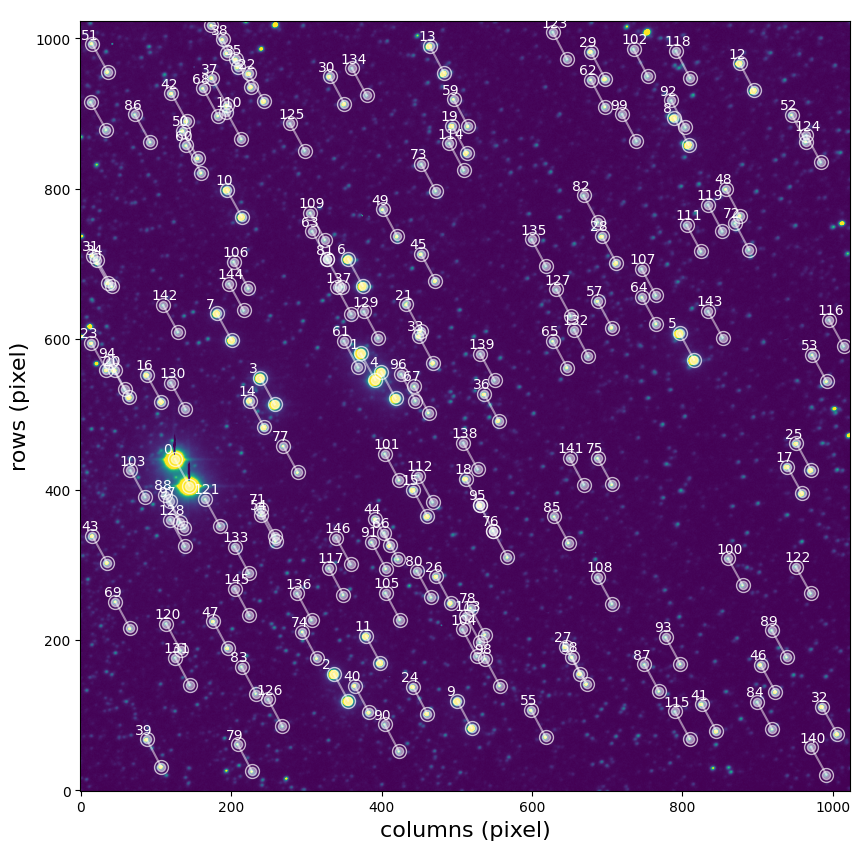

In [23]:
s4plt.plot_sci_polar_frame(polar_stack_sco_4)

2025-09-12 17:02:54,779 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:02:54,779 | INFO | Normalization disabled.


2025-09-12 17:02:54,786 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-12 17:02:54,786 | INFO | Source index: i=4 


2025-09-12 17:02:54,787 root - INFO - Source RA=261.57446485780906 Dec=-38.16011993467493 mag=-17.1718+-0.0002  [pipeline_lib]


2025-09-12 17:02:54,787 | INFO | Source RA=261.57446485780906 Dec=-38.16011993467493 mag=-17.1718+-0.0002


2025-09-12 17:02:54,788 root - INFO - Best aperture radius: 5.0 pixels  [pipeline_lib]


2025-09-12 17:02:54,788 | INFO | Best aperture radius: 5.0 pixels


2025-09-12 17:02:54,789 root - INFO - Polarization in Q: -0.0201+-0.0004  [pipeline_lib]


2025-09-12 17:02:54,789 | INFO | Polarization in Q: -0.0201+-0.0004


2025-09-12 17:02:54,790 root - INFO - Polarization in U: 0.0152+-0.0004  [pipeline_lib]


2025-09-12 17:02:54,790 | INFO | Polarization in U: 0.0152+-0.0004


2025-09-12 17:02:54,791 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:02:54,791 | INFO | Polarization in V: nan+-nan


2025-09-12 17:02:54,792 root - INFO - Total linear polarization p: 0.0252+-0.0004  [pipeline_lib]


2025-09-12 17:02:54,792 | INFO | Total linear polarization p: 0.0252+-0.0004


2025-09-12 17:02:54,793 root - INFO - Angle of polarization theta: 71.4+-0.5  [pipeline_lib]


2025-09-12 17:02:54,793 | INFO | Angle of polarization theta: 71.4+-0.5


2025-09-12 17:02:54,794 root - INFO - Free constant k: 0.8599799136131818+-nan  [pipeline_lib]


2025-09-12 17:02:54,794 | INFO | Free constant k: 0.8599799136131818+-nan


2025-09-12 17:02:54,795 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:02:54,795 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:02:54,796 root - INFO - RMS of zi residuals: 0.0029608737900457083  [pipeline_lib]


2025-09-12 17:02:54,796 | INFO | RMS of zi residuals: 0.0029608737900457083


2025-09-12 17:02:54,797 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 3.15  [pipeline_lib]


2025-09-12 17:02:54,797 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 3.15


2025-09-12 17:02:54,985 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-12 17:02:54,985 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-12 17:02:54,995 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-12 17:02:54,995 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-12 17:02:55,306 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-12 17:02:55,306 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-12 17:02:55,318 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-12 17:02:55,318 | INFO | Substituting symbol \perp from STIXGeneral


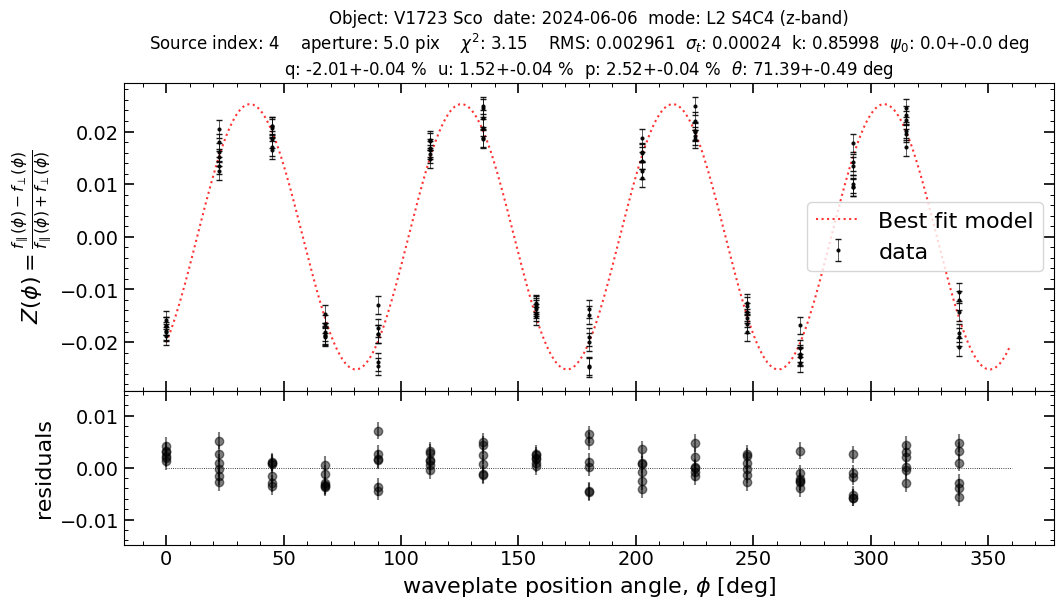

In [24]:
source_index = 4

pol_results_4 = s4pipelib.get_polarimetry_results(polar_sco_4,
                                                source_index=source_index,
                                                min_aperture=4,
                                                max_aperture=8,
                                                plot=True,
                                                verbose=True)

In [25]:
field_star_pol_4 = []

for index in range(0,11,1):
    
    pol_resul_fs_4 = s4pipelib.get_polarimetry_results(polar_sco_4,
                                                source_index=index,
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=False,
                                                verbose=True)
    field_star_pol_4.append(pol_resul_fs_4)

2025-09-12 17:02:57,235 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:02:57,235 | INFO | Normalization disabled.


2025-09-12 17:02:57,243 root - INFO - Source index: i=0   [pipeline_lib]


2025-09-12 17:02:57,243 | INFO | Source index: i=0 


2025-09-12 17:02:57,245 root - INFO - Source RA=261.6077142504545 Dec=-38.170985022806185 mag=-19.698108379538205+-nan  [pipeline_lib]


2025-09-12 17:02:57,245 | INFO | Source RA=261.6077142504545 Dec=-38.170985022806185 mag=-19.698108379538205+-nan


2025-09-12 17:02:57,247 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-09-12 17:02:57,247 | INFO | Best aperture radius: 20.0 pixels


2025-09-12 17:02:57,248 root - INFO - Polarization in Q: -0.009+-0.003  [pipeline_lib]


2025-09-12 17:02:57,248 | INFO | Polarization in Q: -0.009+-0.003


2025-09-12 17:02:57,250 root - INFO - Polarization in U: -0.000+-0.006  [pipeline_lib]


2025-09-12 17:02:57,250 | INFO | Polarization in U: -0.000+-0.006


2025-09-12 17:02:57,251 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:02:57,251 | INFO | Polarization in V: nan+-nan


2025-09-12 17:02:57,252 root - INFO - Total linear polarization p: 0.009+-0.003  [pipeline_lib]


2025-09-12 17:02:57,252 | INFO | Total linear polarization p: 0.009+-0.003


2025-09-12 17:02:57,253 root - INFO - Angle of polarization theta: 90+-9  [pipeline_lib]


2025-09-12 17:02:57,253 | INFO | Angle of polarization theta: 90+-9


2025-09-12 17:02:57,254 root - INFO - Free constant k: 0.9291387653256084+-nan  [pipeline_lib]


2025-09-12 17:02:57,254 | INFO | Free constant k: 0.9291387653256084+-nan


2025-09-12 17:02:57,255 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:02:57,255 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:02:57,256 root - INFO - RMS of zi residuals: 0.006515054014319313  [pipeline_lib]


2025-09-12 17:02:57,256 | INFO | RMS of zi residuals: 0.006515054014319313


2025-09-12 17:02:57,257 root - INFO - Reduced chi-square (n=10.0, DOF=8.0): 211.32  [pipeline_lib]


2025-09-12 17:02:57,257 | INFO | Reduced chi-square (n=10.0, DOF=8.0): 211.32


2025-09-12 17:02:58,720 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:02:58,720 | INFO | Normalization disabled.


2025-09-12 17:02:58,728 root - INFO - Source index: i=1   [pipeline_lib]


2025-09-12 17:02:58,728 | INFO | Source index: i=1 


2025-09-12 17:02:58,731 root - INFO - Source RA=261.5785208818544 Dec=-38.157795064630264 mag=-18.3385+-0.0001  [pipeline_lib]


2025-09-12 17:02:58,731 | INFO | Source RA=261.5785208818544 Dec=-38.157795064630264 mag=-18.3385+-0.0001


2025-09-12 17:02:58,733 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-09-12 17:02:58,733 | INFO | Best aperture radius: 20.0 pixels


2025-09-12 17:02:58,734 root - INFO - Polarization in Q: -0.0064+-0.0002  [pipeline_lib]


2025-09-12 17:02:58,734 | INFO | Polarization in Q: -0.0064+-0.0002


2025-09-12 17:02:58,736 root - INFO - Polarization in U: -0.0001+-0.0002  [pipeline_lib]


2025-09-12 17:02:58,736 | INFO | Polarization in U: -0.0001+-0.0002


2025-09-12 17:02:58,739 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:02:58,739 | INFO | Polarization in V: nan+-nan


2025-09-12 17:02:58,740 root - INFO - Total linear polarization p: 0.0064+-0.0002  [pipeline_lib]


2025-09-12 17:02:58,740 | INFO | Total linear polarization p: 0.0064+-0.0002


2025-09-12 17:02:58,741 root - INFO - Angle of polarization theta: 90.3+-0.8  [pipeline_lib]


2025-09-12 17:02:58,741 | INFO | Angle of polarization theta: 90.3+-0.8


2025-09-12 17:02:58,743 root - INFO - Free constant k: 0.6099387050933859+-nan  [pipeline_lib]


2025-09-12 17:02:58,743 | INFO | Free constant k: 0.6099387050933859+-nan


2025-09-12 17:02:58,744 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:02:58,744 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:02:58,744 root - INFO - RMS of zi residuals: 0.0012773507479010395  [pipeline_lib]


2025-09-12 17:02:58,744 | INFO | RMS of zi residuals: 0.0012773507479010395


2025-09-12 17:02:58,747 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 1.21  [pipeline_lib]


2025-09-12 17:02:58,747 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 1.21


2025-09-12 17:03:00,217 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:00,217 | INFO | Normalization disabled.


2025-09-12 17:03:00,224 root - INFO - Source index: i=2   [pipeline_lib]


2025-09-12 17:03:00,224 | INFO | Source index: i=2 


2025-09-12 17:03:00,225 root - INFO - Source RA=261.4631328886044 Dec=-38.19634971526874 mag=-17.4584+-0.0002  [pipeline_lib]


2025-09-12 17:03:00,225 | INFO | Source RA=261.4631328886044 Dec=-38.19634971526874 mag=-17.4584+-0.0002


2025-09-12 17:03:00,226 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-12 17:03:00,226 | INFO | Best aperture radius: 15.0 pixels


2025-09-12 17:03:00,228 root - INFO - Polarization in Q: -0.0052+-0.0002  [pipeline_lib]


2025-09-12 17:03:00,228 | INFO | Polarization in Q: -0.0052+-0.0002


2025-09-12 17:03:00,229 root - INFO - Polarization in U: 0.0054+-0.0002  [pipeline_lib]


2025-09-12 17:03:00,229 | INFO | Polarization in U: 0.0054+-0.0002


2025-09-12 17:03:00,230 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:00,230 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:00,232 root - INFO - Total linear polarization p: 0.0075+-0.0002  [pipeline_lib]


2025-09-12 17:03:00,232 | INFO | Total linear polarization p: 0.0075+-0.0002


2025-09-12 17:03:00,233 root - INFO - Angle of polarization theta: 67.0+-0.9  [pipeline_lib]


2025-09-12 17:03:00,233 | INFO | Angle of polarization theta: 67.0+-0.9


2025-09-12 17:03:00,235 root - INFO - Free constant k: 0.8147797340909398+-nan  [pipeline_lib]


2025-09-12 17:03:00,235 | INFO | Free constant k: 0.8147797340909398+-nan


2025-09-12 17:03:00,236 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:00,236 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:00,237 root - INFO - RMS of zi residuals: 0.0015187979521897167  [pipeline_lib]


2025-09-12 17:03:00,237 | INFO | RMS of zi residuals: 0.0015187979521897167


2025-09-12 17:03:00,239 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 0.82  [pipeline_lib]


2025-09-12 17:03:00,239 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 0.82


2025-09-12 17:03:01,628 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:01,628 | INFO | Normalization disabled.


2025-09-12 17:03:01,636 root - INFO - Source index: i=3   [pipeline_lib]


2025-09-12 17:03:01,636 | INFO | Source index: i=3 


2025-09-12 17:03:01,638 root - INFO - Source RA=261.59436285778276 Dec=-38.16084933238157 mag=-17.4789+-0.0002  [pipeline_lib]


2025-09-12 17:03:01,638 | INFO | Source RA=261.59436285778276 Dec=-38.16084933238157 mag=-17.4789+-0.0002


2025-09-12 17:03:01,640 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-12 17:03:01,640 | INFO | Best aperture radius: 15.0 pixels


2025-09-12 17:03:01,643 root - INFO - Polarization in Q: -0.0158+-0.0002  [pipeline_lib]


2025-09-12 17:03:01,643 | INFO | Polarization in Q: -0.0158+-0.0002


2025-09-12 17:03:01,644 root - INFO - Polarization in U: 0.0054+-0.0002  [pipeline_lib]


2025-09-12 17:03:01,644 | INFO | Polarization in U: 0.0054+-0.0002


2025-09-12 17:03:01,646 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:01,646 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:01,651 root - INFO - Total linear polarization p: 0.0166+-0.0002  [pipeline_lib]


2025-09-12 17:03:01,651 | INFO | Total linear polarization p: 0.0166+-0.0002


2025-09-12 17:03:01,653 root - INFO - Angle of polarization theta: 80.6+-0.4  [pipeline_lib]


2025-09-12 17:03:01,653 | INFO | Angle of polarization theta: 80.6+-0.4


2025-09-12 17:03:01,655 root - INFO - Free constant k: 0.859026735400088+-nan  [pipeline_lib]


2025-09-12 17:03:01,655 | INFO | Free constant k: 0.859026735400088+-nan


2025-09-12 17:03:01,659 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:01,659 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:01,661 root - INFO - RMS of zi residuals: 0.0014822006835814817  [pipeline_lib]


2025-09-12 17:03:01,661 | INFO | RMS of zi residuals: 0.0014822006835814817


2025-09-12 17:03:01,663 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 0.78  [pipeline_lib]


2025-09-12 17:03:01,663 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 0.78


2025-09-12 17:03:03,335 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:03,335 | INFO | Normalization disabled.


2025-09-12 17:03:03,343 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-12 17:03:03,343 | INFO | Source index: i=4 


2025-09-12 17:03:03,344 root - INFO - Source RA=261.57446485780906 Dec=-38.16011993467493 mag=-18.1369+-0.0001  [pipeline_lib]


2025-09-12 17:03:03,344 | INFO | Source RA=261.57446485780906 Dec=-38.16011993467493 mag=-18.1369+-0.0001


2025-09-12 17:03:03,346 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-09-12 17:03:03,346 | INFO | Best aperture radius: 20.0 pixels


2025-09-12 17:03:03,347 root - INFO - Polarization in Q: -0.0098+-0.0003  [pipeline_lib]


2025-09-12 17:03:03,347 | INFO | Polarization in Q: -0.0098+-0.0003


2025-09-12 17:03:03,349 root - INFO - Polarization in U: 0.0084+-0.0003  [pipeline_lib]


2025-09-12 17:03:03,349 | INFO | Polarization in U: 0.0084+-0.0003


2025-09-12 17:03:03,350 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:03,350 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:03,355 root - INFO - Total linear polarization p: 0.0129+-0.0003  [pipeline_lib]


2025-09-12 17:03:03,355 | INFO | Total linear polarization p: 0.0129+-0.0003


2025-09-12 17:03:03,356 root - INFO - Angle of polarization theta: 69.7+-0.7  [pipeline_lib]


2025-09-12 17:03:03,356 | INFO | Angle of polarization theta: 69.7+-0.7


2025-09-12 17:03:03,358 root - INFO - Free constant k: 2.780100052408098+-nan  [pipeline_lib]


2025-09-12 17:03:03,358 | INFO | Free constant k: 2.780100052408098+-nan


2025-09-12 17:03:03,359 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:03,359 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:03,360 root - INFO - RMS of zi residuals: 0.0022181312945090017  [pipeline_lib]


2025-09-12 17:03:03,360 | INFO | RMS of zi residuals: 0.0022181312945090017


2025-09-12 17:03:03,361 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 2.04  [pipeline_lib]


2025-09-12 17:03:03,361 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 2.04


2025-09-12 17:03:04,839 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:04,839 | INFO | Normalization disabled.


2025-09-12 17:03:04,847 root - INFO - Source index: i=5   [pipeline_lib]


2025-09-12 17:03:04,847 | INFO | Source index: i=5 


2025-09-12 17:03:04,849 root - INFO - Source RA=261.5339719181911 Dec=-38.156624340353936 mag=-17.2829+-0.0002  [pipeline_lib]


2025-09-12 17:03:04,849 | INFO | Source RA=261.5339719181911 Dec=-38.156624340353936 mag=-17.2829+-0.0002


2025-09-12 17:03:04,851 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-09-12 17:03:04,851 | INFO | Best aperture radius: 20.0 pixels


2025-09-12 17:03:04,852 root - INFO - Polarization in Q: -0.0040+-0.0003  [pipeline_lib]


2025-09-12 17:03:04,852 | INFO | Polarization in Q: -0.0040+-0.0003


2025-09-12 17:03:04,853 root - INFO - Polarization in U: 0.0047+-0.0003  [pipeline_lib]


2025-09-12 17:03:04,853 | INFO | Polarization in U: 0.0047+-0.0003


2025-09-12 17:03:04,855 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:04,855 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:04,857 root - INFO - Total linear polarization p: 0.0061+-0.0003  [pipeline_lib]


2025-09-12 17:03:04,857 | INFO | Total linear polarization p: 0.0061+-0.0003


2025-09-12 17:03:04,859 root - INFO - Angle of polarization theta: 65+-1  [pipeline_lib]


2025-09-12 17:03:04,859 | INFO | Angle of polarization theta: 65+-1


2025-09-12 17:03:04,861 root - INFO - Free constant k: 0.7977272329647523+-nan  [pipeline_lib]


2025-09-12 17:03:04,861 | INFO | Free constant k: 0.7977272329647523+-nan


2025-09-12 17:03:04,862 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:04,862 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:04,864 root - INFO - RMS of zi residuals: 0.00199557961825144  [pipeline_lib]


2025-09-12 17:03:04,864 | INFO | RMS of zi residuals: 0.00199557961825144


2025-09-12 17:03:04,866 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 0.91  [pipeline_lib]


2025-09-12 17:03:04,866 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 0.91


2025-09-12 17:03:06,415 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:06,415 | INFO | Normalization disabled.


2025-09-12 17:03:06,423 root - INFO - Source index: i=6   [pipeline_lib]


2025-09-12 17:03:06,423 | INFO | Source index: i=6 


2025-09-12 17:03:06,425 root - INFO - Source RA=261.5804906465538 Dec=-38.14601242233383 mag=-16.9945+-0.0003  [pipeline_lib]


2025-09-12 17:03:06,425 | INFO | Source RA=261.5804906465538 Dec=-38.14601242233383 mag=-16.9945+-0.0003


2025-09-12 17:03:06,426 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-12 17:03:06,426 | INFO | Best aperture radius: 15.0 pixels


2025-09-12 17:03:06,428 root - INFO - Polarization in Q: -0.0159+-0.0003  [pipeline_lib]


2025-09-12 17:03:06,428 | INFO | Polarization in Q: -0.0159+-0.0003


2025-09-12 17:03:06,429 root - INFO - Polarization in U: 0.0056+-0.0003  [pipeline_lib]


2025-09-12 17:03:06,429 | INFO | Polarization in U: 0.0056+-0.0003


2025-09-12 17:03:06,430 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:06,430 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:06,431 root - INFO - Total linear polarization p: 0.0168+-0.0003  [pipeline_lib]


2025-09-12 17:03:06,431 | INFO | Total linear polarization p: 0.0168+-0.0003


2025-09-12 17:03:06,433 root - INFO - Angle of polarization theta: 80.3+-0.4  [pipeline_lib]


2025-09-12 17:03:06,433 | INFO | Angle of polarization theta: 80.3+-0.4


2025-09-12 17:03:06,434 root - INFO - Free constant k: 0.8340527375482686+-nan  [pipeline_lib]


2025-09-12 17:03:06,434 | INFO | Free constant k: 0.8340527375482686+-nan


2025-09-12 17:03:06,435 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:06,435 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:06,439 root - INFO - RMS of zi residuals: 0.0017950547841832538  [pipeline_lib]


2025-09-12 17:03:06,439 | INFO | RMS of zi residuals: 0.0017950547841832538


2025-09-12 17:03:06,441 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 0.64  [pipeline_lib]


2025-09-12 17:03:06,441 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 0.64


2025-09-12 17:03:07,889 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:07,889 | INFO | Normalization disabled.


2025-09-12 17:03:07,898 root - INFO - Source index: i=7   [pipeline_lib]


2025-09-12 17:03:07,898 | INFO | Source index: i=7 


2025-09-12 17:03:07,899 root - INFO - Source RA=261.60115171624113 Dec=-38.15285541576702 mag=-16.4253+-0.0004  [pipeline_lib]


2025-09-12 17:03:07,899 | INFO | Source RA=261.60115171624113 Dec=-38.15285541576702 mag=-16.4253+-0.0004


2025-09-12 17:03:07,900 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-12 17:03:07,900 | INFO | Best aperture radius: 15.0 pixels


2025-09-12 17:03:07,901 root - INFO - Polarization in Q: -0.0089+-0.0004  [pipeline_lib]


2025-09-12 17:03:07,901 | INFO | Polarization in Q: -0.0089+-0.0004


2025-09-12 17:03:07,902 root - INFO - Polarization in U: 0.0055+-0.0004  [pipeline_lib]


2025-09-12 17:03:07,902 | INFO | Polarization in U: 0.0055+-0.0004


2025-09-12 17:03:07,903 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:07,903 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:07,904 root - INFO - Total linear polarization p: 0.0105+-0.0004  [pipeline_lib]


2025-09-12 17:03:07,904 | INFO | Total linear polarization p: 0.0105+-0.0004


2025-09-12 17:03:07,908 root - INFO - Angle of polarization theta: 74+-1  [pipeline_lib]


2025-09-12 17:03:07,908 | INFO | Angle of polarization theta: 74+-1


2025-09-12 17:03:07,909 root - INFO - Free constant k: 0.8547320869608585+-nan  [pipeline_lib]


2025-09-12 17:03:07,909 | INFO | Free constant k: 0.8547320869608585+-nan


2025-09-12 17:03:07,911 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:07,911 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:07,912 root - INFO - RMS of zi residuals: 0.002867165448150486  [pipeline_lib]


2025-09-12 17:03:07,912 | INFO | RMS of zi residuals: 0.002867165448150486


2025-09-12 17:03:07,914 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 0.80  [pipeline_lib]


2025-09-12 17:03:07,914 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 0.80


2025-09-12 17:03:09,440 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:09,440 | INFO | Normalization disabled.


2025-09-12 17:03:09,448 root - INFO - Source index: i=8   [pipeline_lib]


2025-09-12 17:03:09,448 | INFO | Source index: i=8 


2025-09-12 17:03:09,450 root - INFO - Source RA=261.56551935277605 Dec=-38.129184642799814 mag=-16.2809+-0.0004  [pipeline_lib]


2025-09-12 17:03:09,450 | INFO | Source RA=261.56551935277605 Dec=-38.129184642799814 mag=-16.2809+-0.0004


2025-09-12 17:03:09,452 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-12 17:03:09,452 | INFO | Best aperture radius: 15.0 pixels


2025-09-12 17:03:09,453 root - INFO - Polarization in Q: -0.0020+-0.0005  [pipeline_lib]


2025-09-12 17:03:09,453 | INFO | Polarization in Q: -0.0020+-0.0005


2025-09-12 17:03:09,454 root - INFO - Polarization in U: 0.0041+-0.0005  [pipeline_lib]


2025-09-12 17:03:09,454 | INFO | Polarization in U: 0.0041+-0.0005


2025-09-12 17:03:09,456 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:09,456 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:09,457 root - INFO - Total linear polarization p: 0.0046+-0.0005  [pipeline_lib]


2025-09-12 17:03:09,457 | INFO | Total linear polarization p: 0.0046+-0.0005


2025-09-12 17:03:09,460 root - INFO - Angle of polarization theta: 58+-3  [pipeline_lib]


2025-09-12 17:03:09,460 | INFO | Angle of polarization theta: 58+-3


2025-09-12 17:03:09,461 root - INFO - Free constant k: 0.829342882821191+-nan  [pipeline_lib]


2025-09-12 17:03:09,461 | INFO | Free constant k: 0.829342882821191+-nan


2025-09-12 17:03:09,462 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:09,462 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:09,464 root - INFO - RMS of zi residuals: 0.0031932838128840763  [pipeline_lib]


2025-09-12 17:03:09,464 | INFO | RMS of zi residuals: 0.0031932838128840763


2025-09-12 17:03:09,465 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 0.76  [pipeline_lib]


2025-09-12 17:03:09,465 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 0.76


2025-09-12 17:03:11,154 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:11,154 | INFO | Normalization disabled.


2025-09-12 17:03:11,164 root - INFO - Source index: i=9   [pipeline_lib]


2025-09-12 17:03:11,164 | INFO | Source index: i=9 


2025-09-12 17:03:11,166 root - INFO - Source RA=261.3235289498632 Dec=-38.20016942254821 mag=-16.1771+-0.0004  [pipeline_lib]


2025-09-12 17:03:11,166 | INFO | Source RA=261.3235289498632 Dec=-38.20016942254821 mag=-16.1771+-0.0004


2025-09-12 17:03:11,168 root - INFO - Best aperture radius: 12.0 pixels  [pipeline_lib]


2025-09-12 17:03:11,168 | INFO | Best aperture radius: 12.0 pixels


2025-09-12 17:03:11,169 root - INFO - Polarization in Q: -0.0080+-0.0004  [pipeline_lib]


2025-09-12 17:03:11,169 | INFO | Polarization in Q: -0.0080+-0.0004


2025-09-12 17:03:11,171 root - INFO - Polarization in U: 0.0376+-0.0004  [pipeline_lib]


2025-09-12 17:03:11,171 | INFO | Polarization in U: 0.0376+-0.0004


2025-09-12 17:03:11,173 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:11,173 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:11,175 root - INFO - Total linear polarization p: 0.0385+-0.0004  [pipeline_lib]


2025-09-12 17:03:11,175 | INFO | Total linear polarization p: 0.0385+-0.0004


2025-09-12 17:03:11,176 root - INFO - Angle of polarization theta: 51.0+-0.3  [pipeline_lib]


2025-09-12 17:03:11,176 | INFO | Angle of polarization theta: 51.0+-0.3


2025-09-12 17:03:11,178 root - INFO - Free constant k: 0.878023662154499+-nan  [pipeline_lib]


2025-09-12 17:03:11,178 | INFO | Free constant k: 0.878023662154499+-nan


2025-09-12 17:03:11,179 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:11,179 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:11,180 root - INFO - RMS of zi residuals: 0.0027361321691835158  [pipeline_lib]


2025-09-12 17:03:11,180 | INFO | RMS of zi residuals: 0.0027361321691835158


2025-09-12 17:03:11,190 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 0.65  [pipeline_lib]


2025-09-12 17:03:11,190 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 0.65


2025-09-12 17:03:12,713 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:03:12,713 | INFO | Normalization disabled.


2025-09-12 17:03:12,722 root - INFO - Source index: i=10   [pipeline_lib]


2025-09-12 17:03:12,722 | INFO | Source index: i=10 


2025-09-12 17:03:12,724 root - INFO - Source RA=261.6112349135349 Dec=-38.13773260855382 mag=-16.1370+-0.0005  [pipeline_lib]


2025-09-12 17:03:12,724 | INFO | Source RA=261.6112349135349 Dec=-38.13773260855382 mag=-16.1370+-0.0005


2025-09-12 17:03:12,726 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-09-12 17:03:12,726 | INFO | Best aperture radius: 20.0 pixels


2025-09-12 17:03:12,728 root - INFO - Polarization in Q: -0.0176+-0.0006  [pipeline_lib]


2025-09-12 17:03:12,728 | INFO | Polarization in Q: -0.0176+-0.0006


2025-09-12 17:03:12,729 root - INFO - Polarization in U: 0.0173+-0.0006  [pipeline_lib]


2025-09-12 17:03:12,729 | INFO | Polarization in U: 0.0173+-0.0006


2025-09-12 17:03:12,730 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:03:12,730 | INFO | Polarization in V: nan+-nan


2025-09-12 17:03:12,732 root - INFO - Total linear polarization p: 0.0247+-0.0006  [pipeline_lib]


2025-09-12 17:03:12,732 | INFO | Total linear polarization p: 0.0247+-0.0006


2025-09-12 17:03:12,735 root - INFO - Angle of polarization theta: 67.7+-0.7  [pipeline_lib]


2025-09-12 17:03:12,735 | INFO | Angle of polarization theta: 67.7+-0.7


2025-09-12 17:03:12,738 root - INFO - Free constant k: 0.8604927169082083+-nan  [pipeline_lib]


2025-09-12 17:03:12,738 | INFO | Free constant k: 0.8604927169082083+-nan


2025-09-12 17:03:12,739 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:03:12,739 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:03:12,740 root - INFO - RMS of zi residuals: 0.0043222308085938965  [pipeline_lib]


2025-09-12 17:03:12,740 | INFO | RMS of zi residuals: 0.0043222308085938965


2025-09-12 17:03:12,741 root - INFO - Reduced chi-square (n=96.0, DOF=94.0): 0.80  [pipeline_lib]


2025-09-12 17:03:12,741 | INFO | Reduced chi-square (n=96.0, DOF=94.0): 0.80


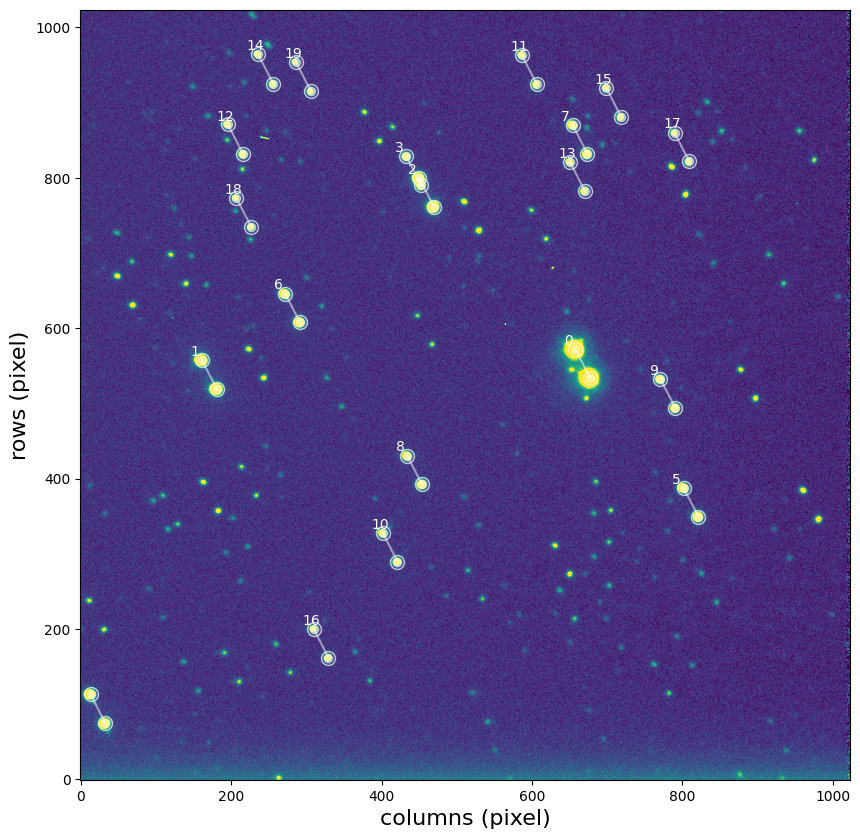

In [34]:
s4plt.plot_sci_polar_frame(polar_stack_std_1)

2025-09-12 17:29:59,231 astropop - INFO - Normalization disabled.  [__init__]


2025-09-12 17:29:59,231 | INFO | Normalization disabled.


2025-09-12 17:29:59,240 root - INFO - Source index: i=0   [pipeline_lib]


2025-09-12 17:29:59,240 | INFO | Source index: i=0 


2025-09-12 17:29:59,242 root - INFO - Source RA=140.6239792568328 Dec=-52.482574573110305 mag=nan+-nan  [pipeline_lib]


2025-09-12 17:29:59,242 | INFO | Source RA=140.6239792568328 Dec=-52.482574573110305 mag=nan+-nan


2025-09-12 17:29:59,243 root - INFO - Best aperture radius: 10.0 pixels  [pipeline_lib]


2025-09-12 17:29:59,243 | INFO | Best aperture radius: 10.0 pixels


2025-09-12 17:29:59,244 root - INFO - Polarization in Q: 0.0490+-0.0003  [pipeline_lib]


2025-09-12 17:29:59,244 | INFO | Polarization in Q: 0.0490+-0.0003


2025-09-12 17:29:59,246 root - INFO - Polarization in U: -0.0025+-0.0003  [pipeline_lib]


2025-09-12 17:29:59,246 | INFO | Polarization in U: -0.0025+-0.0003


2025-09-12 17:29:59,249 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2025-09-12 17:29:59,249 | INFO | Polarization in V: nan+-nan


2025-09-12 17:29:59,252 root - INFO - Total linear polarization p: 0.0491+-0.0003  [pipeline_lib]


2025-09-12 17:29:59,252 | INFO | Total linear polarization p: 0.0491+-0.0003


2025-09-12 17:29:59,255 root - INFO - Angle of polarization theta: 178.5+-0.2  [pipeline_lib]


2025-09-12 17:29:59,255 | INFO | Angle of polarization theta: 178.5+-0.2


2025-09-12 17:29:59,257 root - INFO - Free constant k: 0.8600331407482932+-nan  [pipeline_lib]


2025-09-12 17:29:59,257 | INFO | Free constant k: 0.8600331407482932+-nan


2025-09-12 17:29:59,259 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2025-09-12 17:29:59,259 | INFO | Zero of polarization: 0.0+-0.0


2025-09-12 17:29:59,262 root - INFO - RMS of zi residuals: 0.0020749088328717216  [pipeline_lib]


2025-09-12 17:29:59,262 | INFO | RMS of zi residuals: 0.0020749088328717216


2025-09-12 17:29:59,263 root - INFO - Reduced chi-square (n=100.0, DOF=98.0): 1.07  [pipeline_lib]


2025-09-12 17:29:59,263 | INFO | Reduced chi-square (n=100.0, DOF=98.0): 1.07


2025-09-12 17:29:59,424 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-12 17:29:59,424 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-12 17:29:59,433 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-12 17:29:59,433 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-12 17:29:59,734 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-12 17:29:59,734 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-12 17:29:59,743 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-12 17:29:59,743 | INFO | Substituting symbol \perp from STIXGeneral


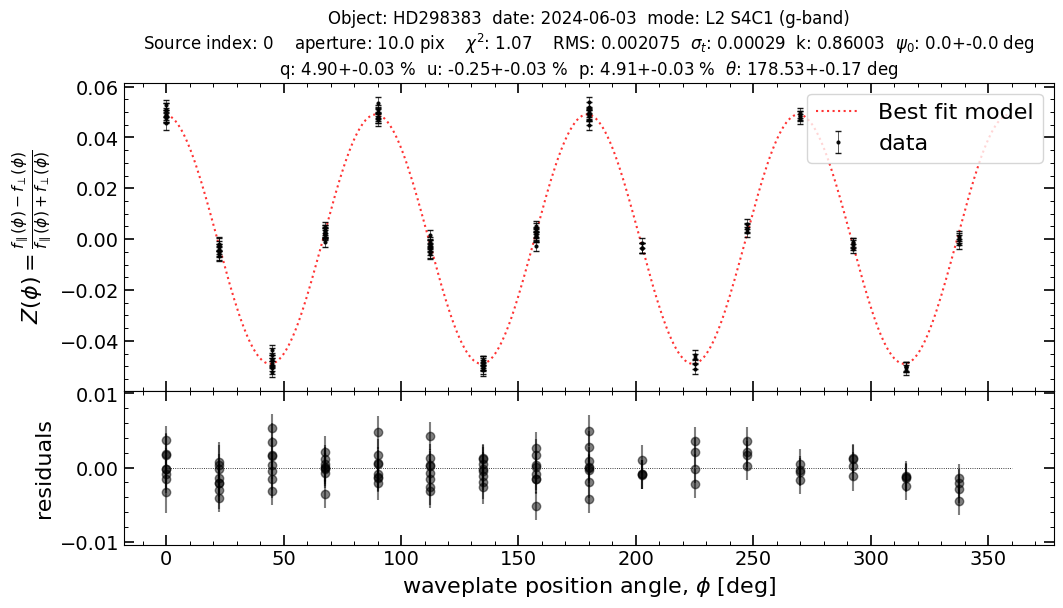

In [35]:
source_index = 0

pol_results_std_1 = s4pipelib.get_polarimetry_results(polar_std_1,
                                                source_index=source_index,
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)